In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

Essaye d'importer les données depuis un fichier local afin de péréniser les données en cas de problème avec la source.
Si le fichier local n'existe pas, importe les données depuis le site internet original.

In [3]:
try:
    raw_data = pd.read_csv('incidence-PAY-7.csv')
    print("imported local data")
except FileNotFoundError:
    print("import data from the internet and save it to a local file")
    raw_data = pd.read_csv(data_url, skiprows=1)
    raw_data.to_csv('incidence-PAY-7.csv')
    
print(raw_data)

imported local data
      Unnamed: 0    week  indicator    inc  inc_low  inc_up  inc100  \
0              0  202113          7   9838     6381   13295      15   
1              1  202112          7  11520     8415   14625      17   
2              2  202111          7   9386     6678   12094      14   
3              3  202110          7   9056     6452   11660      14   
4              4  202109          7  10988     7938   14038      17   
5              5  202108          7  11281     8361   14201      17   
6              6  202107          7  13561    10315   16807      21   
7              7  202106          7  13401     9810   16992      20   
8              8  202105          7  12210     8988   15432      18   
9              9  202104          7  12026     8826   15226      18   
10            10  202103          7   8913     6375   11451      13   
11            11  202102          7   7795     5430   10160      12   
12            12  202101          7  10525     7750   133

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de point à éliminer.

In [5]:
data = raw_data.dropna().copy()
data

Unnamed: 0    week  indicator    inc  inc_low  inc_up  inc100  \
0              0  202113          7   9838     6381   13295      15   
1              1  202112          7  11520     8415   14625      17   
2              2  202111          7   9386     6678   12094      14   
3              3  202110          7   9056     6452   11660      14   
4              4  202109          7  10988     7938   14038      17   
5              5  202108          7  11281     8361   14201      17   
6              6  202107          7  13561    10315   16807      21   
7              7  202106          7  13401     9810   16992      20   
8              8  202105          7  12210     8988   15432      18   
9              9  202104          7  12026     8826   15226      18   
10            10  202103          7   8913     6375   11451      13   
11            11  202102          7   7795     5430   10160      12   
12            12  202101          7  10525     7750   13300      16   
13            13  202053          7  11978     8406   15550      18   
14            14  202052          7  12012     8285   15739      18   
15            15  202051          7  10564     7574   13554      16   
16            16  202050          7   7063     4744    9382      11   
17            17  202049          7   5026     3145    6907       8   
18            18  202048          7   6683     4312    9054      10   
19            19  202047          7   4999     2963    7035       8   
20            20  202046          7   3752     1963    5541       6   
21            21  202045          7   3696     2016    5376       6   
22            22  202044          7   4391     2375    6407       7   
23            23  202043          7   4376     2505    6247       7   
24            24  202042          7   4000     1979    6021       6   
25            25  202041          7   3961     2099    5823       6   
26            26  202040          7   2078      675    3481       3   
27            27  202039          7   1049      237    1861       2   
28            28  202038          7   2251      781    3721       3   
29            29  202037          7   1584      405    2763       2   
...          ...     ...        ...    ...      ...     ...     ...   
1553        1553  199126          7  17608    11304   23912      31   
1554        1554  199125          7  16169    10700   21638      28   
1555        1555  199124          7  16171    10071   22271      28   
1556        1556  199123          7  11947     7671   16223      21   
1557        1557  199122          7  15452     9953   20951      27   
1558        1558  199121          7  14903     8975   20831      26   
1559        1559  199120          7  19053    12742   25364      34   
1560        1560  199119          7  16739    11246   22232      29   
1561        1561  199118          7  21385    13882   28888      38   
1562        1562  199117          7  13462     8877   18047      24   
1563        1563  199116          7  14857    10068   19646      26   
1564        1564  199115          7  13975     9781   18169      25   
1565        1565  199114          7  12265     7684   16846      22   
1566        1566  199113          7   9567     6041   13093      17   
1567        1567  199112          7  10864     7331   14397      19   
1568        1568  199111          7  15574    11184   19964      27   
1569        1569  199110          7  16643    11372   21914      29   
1570        1570  199109          7  13741     8780   18702      24   
1571        1571  199108          7  13289     8813   17765      23   
1572        1572  199107          7  12337     8077   16597      22   
1573        1573  199106          7  10877     7013   14741      19   
1574        1574  199105          7  10442     6544   14340      18   
1575        1575  199104          7   7913     4563   11263      14   
1576        1576  199103          7  15387    10484   20290      27   
1577        1577  199102      

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [7]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.


In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Rien n'est retourné car il n'y a pas de discontinuité dans les donées.

Un premier regard sur les données !

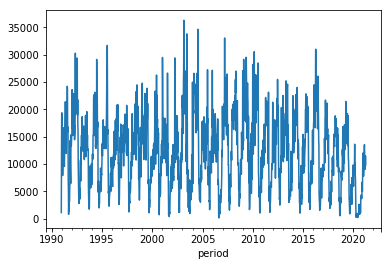

In [9]:
sorted_data['inc'].plot()

## Etude de l'incidence annuelle

Nous définissons la période de référence du 1er septembre de l'année $N$ au
1er septembre de l'année $N+1$ pour obtenir les résultats demandés dans cette exercice.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Dans l'éventualité ou la première année serais incomplète, nous commençons l'analyse un an après la première. Une analyse plus rigoureuse serais nécessaire en temps normal pour évaluer les durées de chaque donnée.

De plus, l'année en cour est retirée car incomplète.

In [10]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(sorted_data.index[0].year+1,
                                    sorted_data.index[-1].year-1)]

En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [11]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

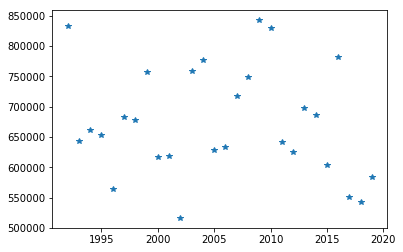

In [12]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [13]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

In [14]:
maximum = yearly_incidence.max()
list_max = yearly_incidence[yearly_incidence == yearly_incidence.max()]
first_max = list_max.index[0]
print("Année avec l'épidémie la plus forte %s pour un nombre de contamination de %s" % (first_max, maximum))

Année avec l'épidémie la plus forte 2009 pour un nombre de contamination de 842373


In [15]:
minimum = yearly_incidence.min()
list_min = yearly_incidence[yearly_incidence == yearly_incidence.min()]
first_min = list_min.index[0] 
print("Année avec l'épidémie la plus faible = %s pour un nombre de contamination de %s" % (first_min, minimum))

Année avec l'épidémie la plus faible = 2002 pour un nombre de contamination de 516689
